In [3]:
import librosa
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import os
from tqdm import tqdm_notebook as tqdm

In [4]:
meta_path = "D:/korean-single-speaker-speech-dataset/transcript.v.1.2.txt"


with open(meta_path, encoding='utf-8') as f:
    metadata = np.array([line.strip().split('|') for line in f])
#     hours = sum((int(x[2]) for x in metadata)) * frame_shift_ms / (3600 * 1000)
#     log('Loaded metadata for %d examples (%.2f hours)' % (len(metadata), hours))

# metadata = metadata[:32, :2]

max_sequence_len = max(list(map(len, metadata[:, 1])))

error_jamos = [5868, 5998, 6046, 6155, 6202, 
               6654, 6890, 7486, 7502, 7744, 
               7765, 8267, 9069, 9927, 10437, 
               10515, 10533, 10606, 10610, 12777]

print(metadata.shape)
metadata = np.delete(metadata, error_jamos, axis = 0)
print(metadata.shape)

dataset_size = len(metadata)

(12853, 5)
(12833, 5)


In [5]:
character_length = list()
file_length = list()
division_length = list()
unicode_jamo_list = list()

for i in range(len(metadata)):
    character_length.append(len(metadata[i, 3]))
    file_length.append(float(metadata[i, 4]))
    division_length.append(float(metadata[i, 4]) * 1000 / len(metadata[i, 3]))
    
#     if i not in error_jamos:
    for char in metadata[i, 3]:
        if char not in unicode_jamo_list:
            unicode_jamo_list.append(char)

In [6]:
wave_name_list = []

for data in metadata:
    wave_name_list.append(data[0])
    
data_folder = "D:/korean-single-speaker-speech-dataset/kss"

In [7]:
n_mels = 80
fs = 22050
frame_length_ms=50
frame_shift_ms=12.5
nsc = int(22050 * frame_length_ms / 1000)
nov = nsc - int(22050 * frame_shift_ms / 1000)
nhop = int(22050 * frame_shift_ms / 1000)
eps = 1e-10
db_ref = 100

mel_folder = "D:/korean-single-speaker-speech-dataset/kss/mels"

ratio = list()

for i, wav_name in tqdm(enumerate(wave_name_list)):
#     wav_path = os.path.join(data_folder, wav_name)
    
#     npy_name = wav_name.replace('.wav', '.npy')
    
#     y, sr = librosa.core.load(wav_path)
    
#     f, t, Zxx = sp.signal.stft(y, fs=sr, nperseg=nsc, noverlap=nov)

#     Sxx = np.abs(Zxx)
#     Sxx = np.maximum(Sxx, eps)

#     mel_filters = librosa.filters.mel(sr=fs, n_fft=nsc, n_mels=n_mels)

#     mel_specgram = np.matmul(mel_filters, Sxx)

#     log_specgram = 20*np.log10(Sxx)

#     norm_log_specgram = (log_specgram + db_ref) / db_ref

#     log_mel_specgram = 20 * np.log10(np.maximum(mel_specgram, eps))

#     norm_log_mel_specgram = (log_mel_specgram + db_ref) / db_ref
    
    mel_path = os.path.join(mel_folder, wav_name.replace('.wav', '.npy'))
    mel_target = np.load(mel_path)
    
#     np.save(specgram_path, norm_log_specgram)
#     np.save(mel_path, norm_log_mel_specgram)
#     np.save(specgram_path, Sxx)
#     np.save(mel_path, norm_log_mel_specgram)
    
#     print(norm_log_mel_specgram.shape[1])

#     fig = plt.figure(figsize=(18, 6))
#     ax = fig.add_subplot(211)
#     plt.imshow(log_specgram, origin='lower', aspect='auto')
#     plt.colorbar()
    
#     ax2 = fig.add_subplot(212)
# #     plt.figure(figsize=(16,9))
#     plt.imshow(norm_log_mel_specgram, origin='lower', aspect='auto')
#     plt.colorbar()
#     plt.show()    
    
#     print(list(metadata[i][3]))
    
    ratio.append(mel_target.shape[1]/ len(metadata[i][3]))


12833


(array([0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.300e+01, 4.770e+02,
        2.915e+03, 4.343e+03, 2.759e+03, 1.280e+03, 5.090e+02, 2.240e+02,
        1.220e+02, 5.800e+01, 3.600e+01, 3.000e+01, 1.700e+01, 1.300e+01,
        3.000e+00, 2.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 20 Patch objects>)

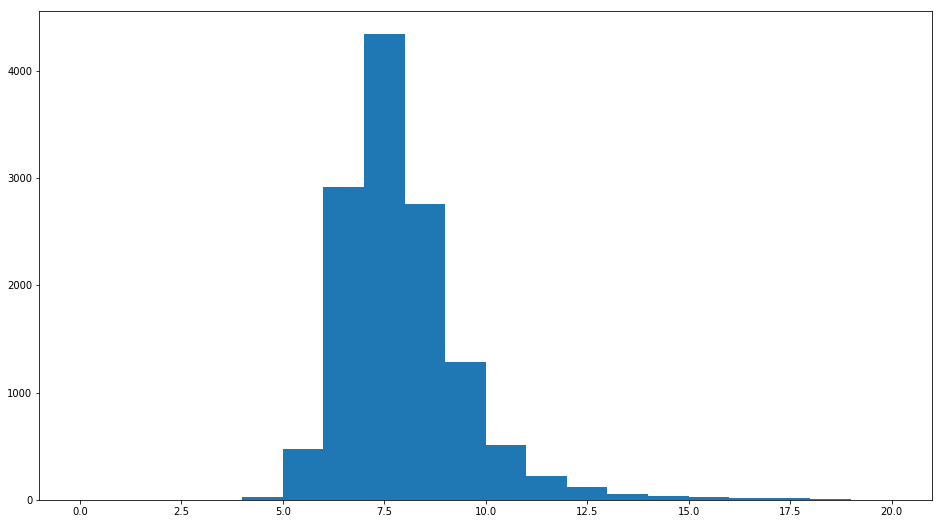

In [9]:
plt.figure(figsize=(16,9))
print(len(ratio))

plt.hist(ratio, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])